Question 1

In [155]:
import numpy as np
np.random.seed(4129)
Xt = np.round(np.concatenate([[0], np.random.normal(0,2,size=9)]),1)
Zt = np.cumsum(Xt)

In [156]:
s = ['$X_{0} = {1}$,  '.format(t,xt) for t,xt in enumerate(Xt)]
"".join(s)

'$X_0 = 0.0$,  $X_1 = 0.8$,  $X_2 = -1.1$,  $X_3 = 0.2$,  $X_4 = 1.6$,  $X_5 = -1.7$,  $X_6 = -1.1$,  $X_7 = -2.0$,  $X_8 = 0.0$,  $X_9 = -0.6$,  '

In [157]:
Zt

array([ 0. ,  0.8, -0.3, -0.1,  1.5, -0.2, -1.3, -3.3, -3.3, -3.9])

In [158]:
Zt-1.7

array([-1.7, -0.9, -2. , -1.8, -0.2, -1.9, -3. , -5. , -5. , -5.6])

In [159]:
np.cumsum(Xt+.3)-.3

array([ 0. ,  1.1,  0.3,  0.8,  2.7,  1.3,  0.5, -1.2, -0.9, -1.2])

# Question 2

## Generation of data

In [160]:
import scipy.optimize
import numpy as np
from matplotlib import pylab as plt
np.random.seed(100)

In [161]:
a=1
b=.5
c=1./2
f = lambda a,b,c, n: a*(b*n+1)**(-c)

(0, 1)

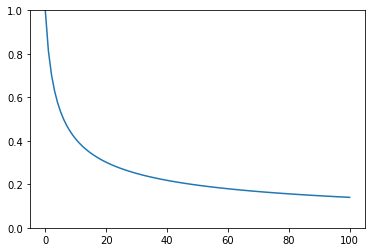

In [162]:
n = np.linspace(0,100,100)
plt.plot(n,f(a,b,c,n));
plt.ylim([0,1])

In [163]:
n = np.array([0,1,2,7,14,42])
ymore = np.array([np.random.binomial(1520,p=f(a,b,c,nn)) for nn in n])/1520
y = np.array([np.random.binomial(60,p=f(a,b,c,nn)) for nn in n])/60
y[4] = .35
ymore[4] = .35
y_new = .15
y2 = np.concatenate([y, [y_new]])
n2 = np.array([0,1,2,7,14,42,60])
np.round(y,2)

array([1.  , 0.87, 0.78, 0.42, 0.35, 0.27])

In [164]:
n

array([ 0,  1,  2,  7, 14, 42])

In [165]:
def model(p, x=n):
    return np.round(f(p[0],p[1],p[2],x),2)

In [166]:
def rmse(p, x=n, data=y):
    return np.sqrt(np.mean((data-model(p, x))**2))

In [167]:
return_fit = scipy.optimize.minimize(lambda p: rmse(p, data=ymore), [1,2,.1], method = 'Nelder-Mead')
bfit = return_fit['x'] #least_squares returns a dictionary of lot of things. We just pick 'x', which is the fitted parameters

In [168]:
bfit = [1,.53,.49]

In [169]:
bfit2 = [1.0, .45, .47]

[1.         0.86666667 0.78333333 0.41666667 0.35       0.26666667]


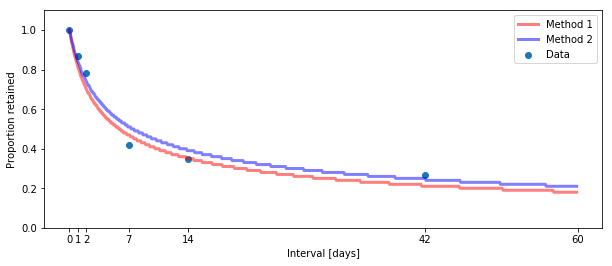

In [170]:
plt.figure(figsize=[10,4])
plt.scatter(n, y, label = 'Data')
nfit = np.arange(0,60,.1)
plt.plot(nfit, model(bfit, x=nfit), alpha=.5, linewidth=3, color='red', label='Method 1')
plt.plot(nfit, model(bfit2, x=nfit), alpha=.5, linewidth=3, color='blue', label='Method 2')
plt.xlabel('Interval [days]')
plt.ylabel('Proportion retained')
plt.xticks(np.concatenate([n,[60]]))
plt.ylim([0,1.1])
plt.legend()
plt.savefig('assignment2_figure1.png')
print(y)

In [171]:
y = np.round(y,2)
y2 = np.round(y2,2)

In [172]:
"{0:.2f} {1:.2f} {2:.2f}".format(*bfit)

'1.00 0.53 0.49'

In [173]:
"{0:.2f} {1:.2f} {2:.2f}".format(*bfit2)

'1.00 0.45 0.47'

In [198]:
print(rmse(bfit, n2, y2)**2, rmse(bfit, n, y)**2)

0.0011643257677837165 0.0026833333333333344


In [199]:
print(rmse(bfit2, n2, y2)**2, rmse(bfit2, n, y)**2)

5.418004695609786e-06 0.002100000000000002


In [176]:
np.round(y2,2)

array([1.  , 0.87, 0.78, 0.42, 0.35, 0.27, 0.15])

In [190]:
model(bfit,n2)

array([1.  , 0.81, 0.7 , 0.47, 0.35, 0.21, 0.18])

Solutions

In [178]:
t = np.array([0,1,2,7,14,42])
d = np.array([1,.87,.78,.42,.35,.27])

In [179]:
a=1; b=.53; c=.49;
y1 = a*(b*t+1)**(-c)

In [180]:
a=1; b=.45; c=.47;
y2 = a*(b*t+1)**(-c)

In [181]:
np.sqrt(np.mean((d-y1)**2))

0.04989592337771896

In [182]:
np.sqrt(np.mean((d-y2)**2))

0.04746443488068355

Augmented dataset

In [183]:
t = np.array([0,1,2,7,14,42,60])
d = np.array([1,.87,.78,.42,.35,.27,.15])

In [184]:
a=1; b=.53; c=.49;
y1 = a*(b*t+1)**(-c)

In [185]:
a=1; b=.45; c=.47;
y2 = a*(b*t+1)**(-c)

In [191]:
np.sqrt(np.mean((d-y1)**2))**2

0.0022695512808964947

In [187]:
np.sqrt(np.mean((d-y2)**2))

0.049252452409110026

In [188]:
Predicted proportion:

SyntaxError: invalid syntax (<ipython-input-188-c5b72f64cba4>, line 1)

In [ ]:
y1[-1]

In [ ]:
y2[-1]